In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/kushtrivedi/Downloads/KC_House_Prediction/kc_house.csv")

In [80]:
def basicSummary(dataFrameForSummary):
    print(f'Shape : {dataFrameForSummary.shape}')
    summary = pd.DataFrame(dataFrameForSummary.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Num of Nulls'] = dataFrameForSummary.isnull().sum().values
    summary['Num of Unique'] = dataFrameForSummary.nunique().values
    summary['First Value'] = dataFrameForSummary.loc[0].values
    summary['Second Value'] = dataFrameForSummary.loc[1].values
    summary['Third Value'] = dataFrameForSummary.loc[2].values
    summary['Fourth Value'] = dataFrameForSummary.loc[3].values
    summary['Fifth Value'] = dataFrameForSummary.loc[4].values
    return summary

In [81]:
basicSummary(df)

Shape : (21597, 20)


,Feature,Data Type,Num of Nulls,Num of Unique,First Value,Second Value,Third Value,Fourth Value,Fifth Value
0,id,int64,0,21420,7.129301e+09,6.414100e+09,5.631500e+09,2.487201e+09,1.954401e+09
1,price,float64,0,3622,2.510410e+00,2.579884e+00,2.493264e+00,2.588616e+00,2.575826e+00
2,bedrooms,int64,0,12,3.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00
3,bathrooms,float64,0,29,1.000000e+00,2.250000e+00,1.000000e+00,3.000000e+00,2.000000e+00
4,sqft_living,int64,0,1034,1.180000e+03,2.570000e+03,7.700000e+02,1.960000e+03,1.680000e+03
5,sqft_lot,int64,0,9776,5.650000e+03,7.242000e+03,1.000000e+04,5.000000e+03,8.080000e+03
6,floors,float64,0,6,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
7,waterfront,int64,0,2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,view,int64,0,5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,condition,int64,0,5,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00


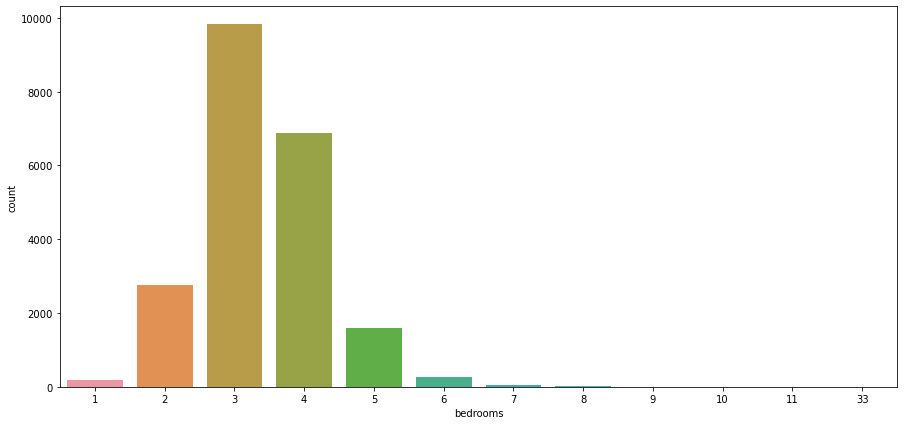

In [36]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.bedrooms)
plt.show()

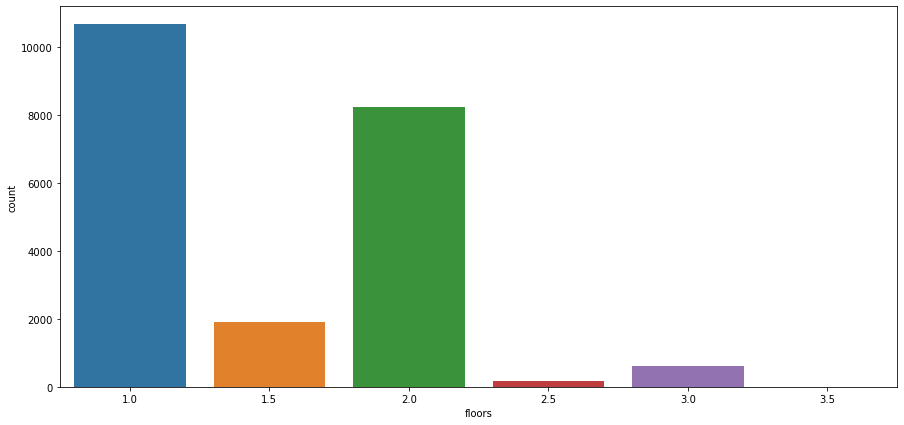

In [37]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.floors)
plt.show()

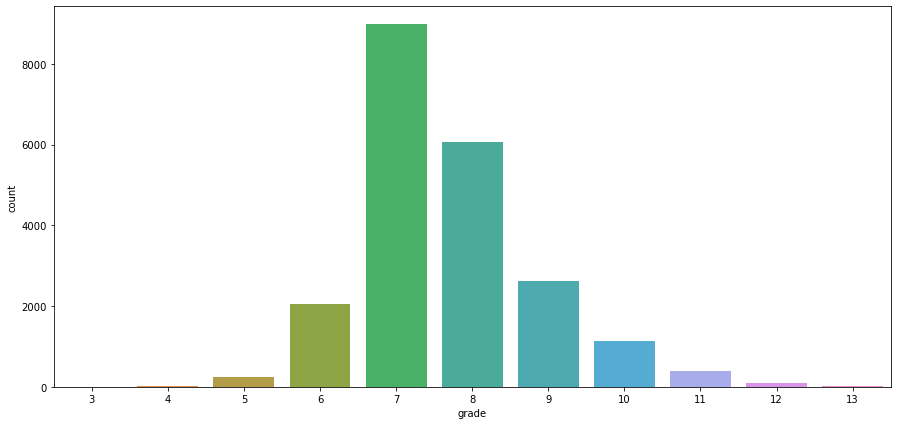

In [38]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.grade)
plt.show()

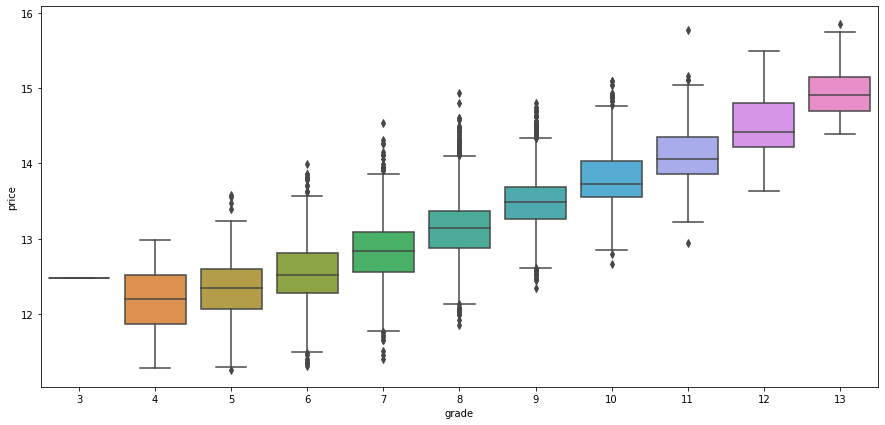

In [35]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=df.grade, y=df.price)
plt.show()

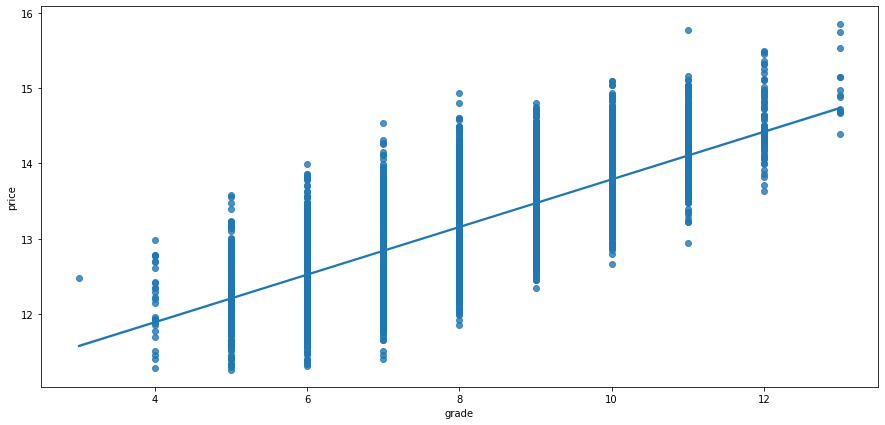

In [39]:
plt.figure(figsize=(15, 7))
sns.regplot(x=df.grade, y=df.price)
plt.show()

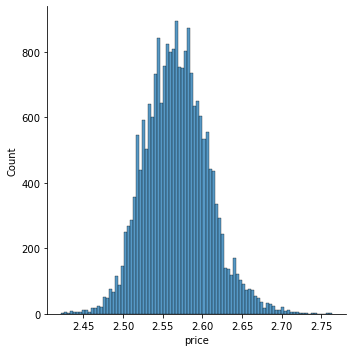

In [82]:
sns.displot(x=df.price)
plt.show()

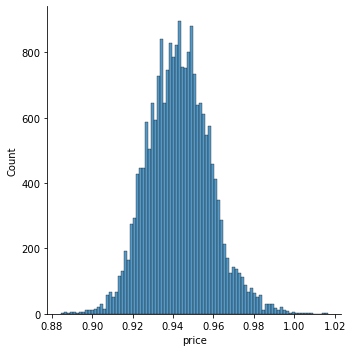

In [83]:
df['price'] = df['price'].apply(lambda x: np.log(x))
sns.displot(x=df.price)
plt.show()

In [11]:
continuous_columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
                      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                      'sqft_living15', 'sqft_lot15']

Column Name: id


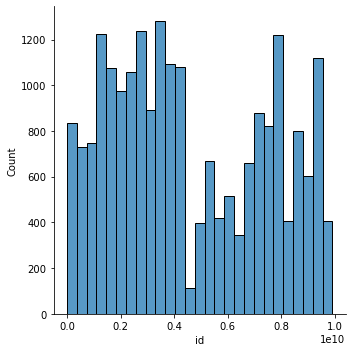

Column Name: price


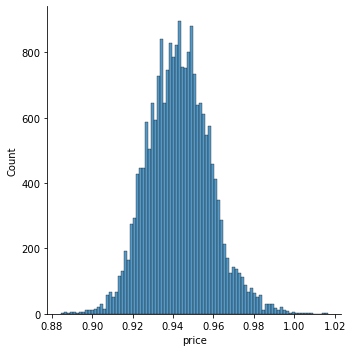

Column Name: bedrooms


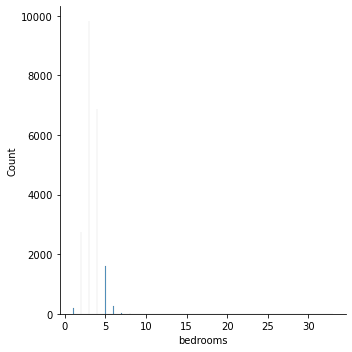

Column Name: bathrooms


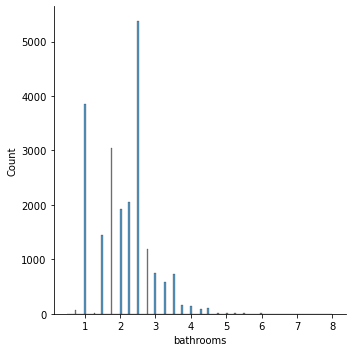

Column Name: sqft_living


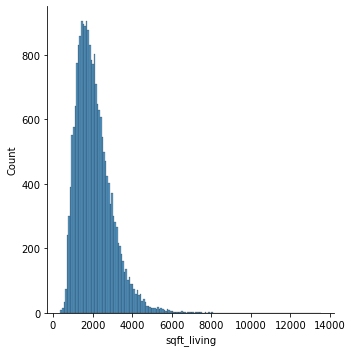

Column Name: sqft_lot


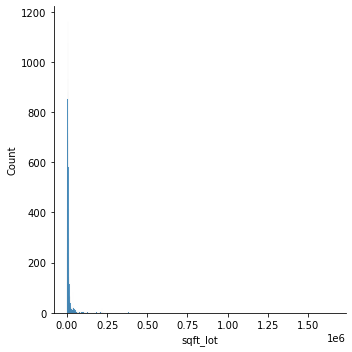

Column Name: waterfront


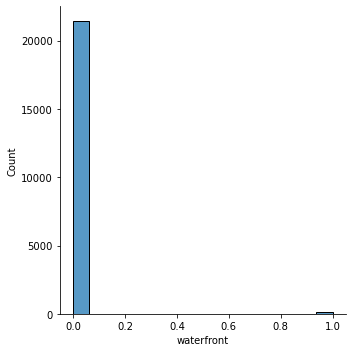

Column Name: sqft_above


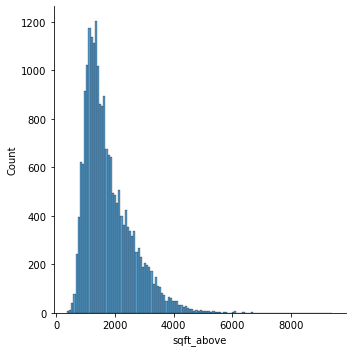

Column Name: sqft_basement


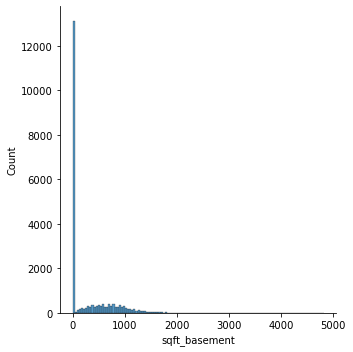

Column Name: yr_built


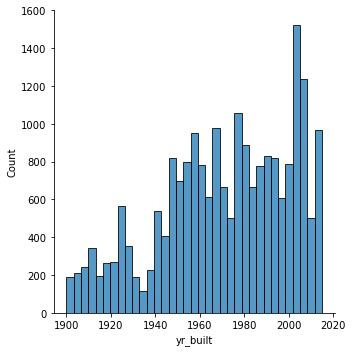

Column Name: yr_renovated


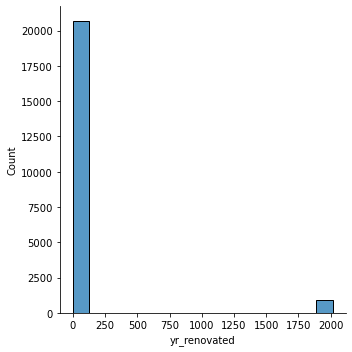

Column Name: zipcode


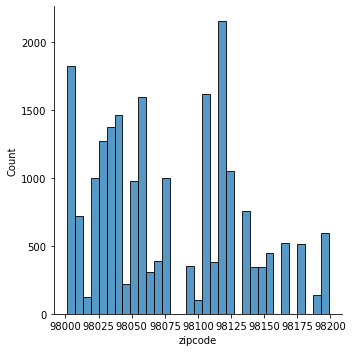

Column Name: lat


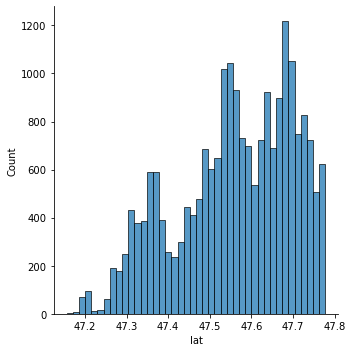

Column Name: long


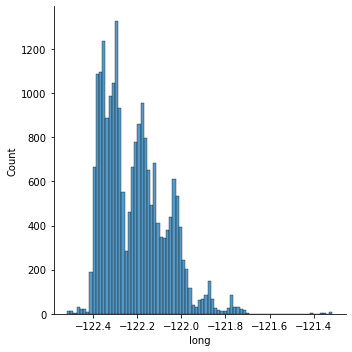

Column Name: sqft_living15


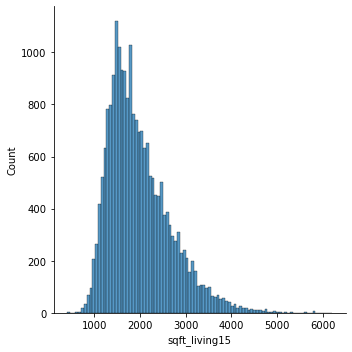

Column Name: sqft_lot15


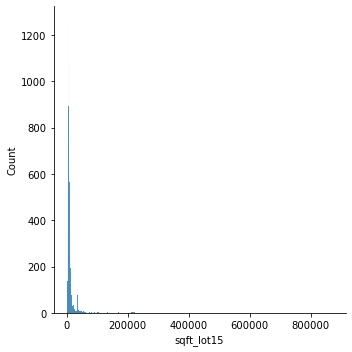

In [84]:
for i in continuous_columns:
    print("Column Name:", i)
    sns.displot(x=df[i])
    plt.show()

Column Name: id


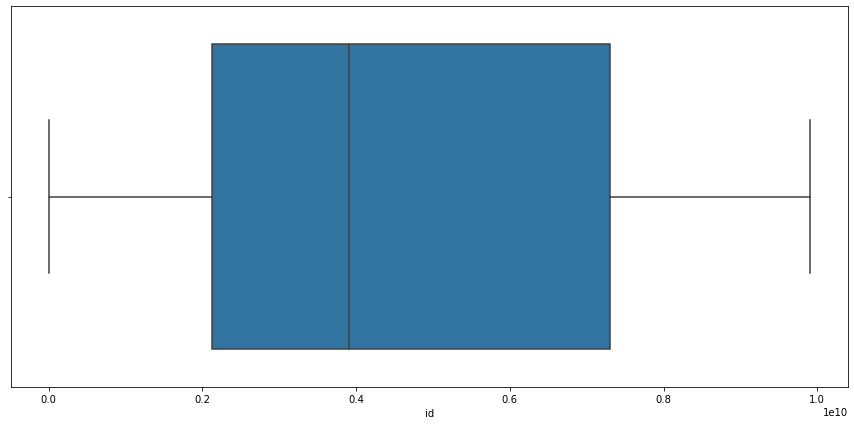

Column Name: price


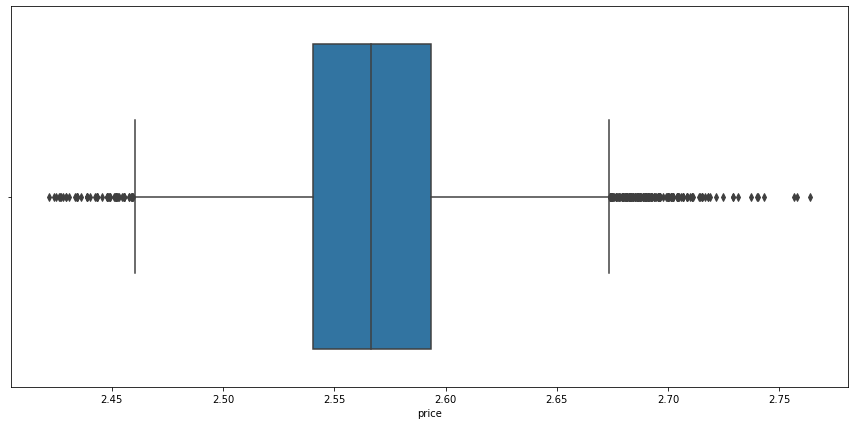

Column Name: bedrooms


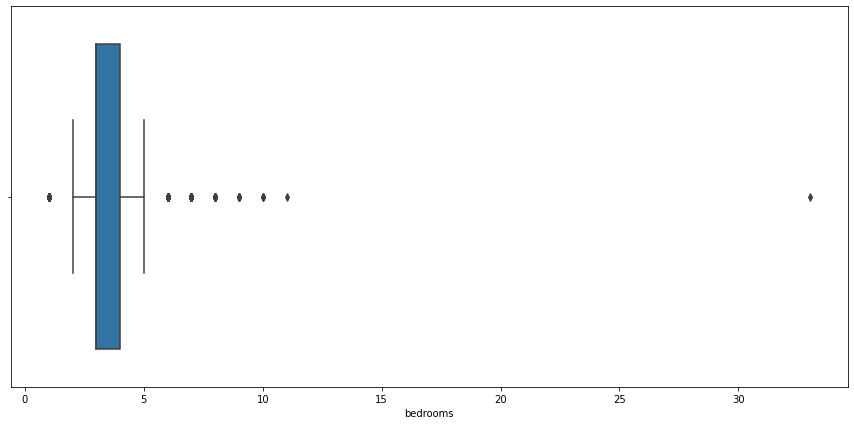

Column Name: bathrooms


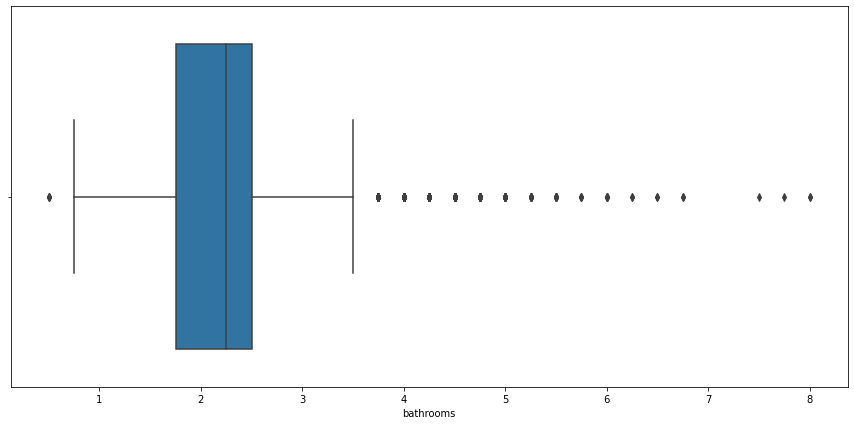

Column Name: sqft_living


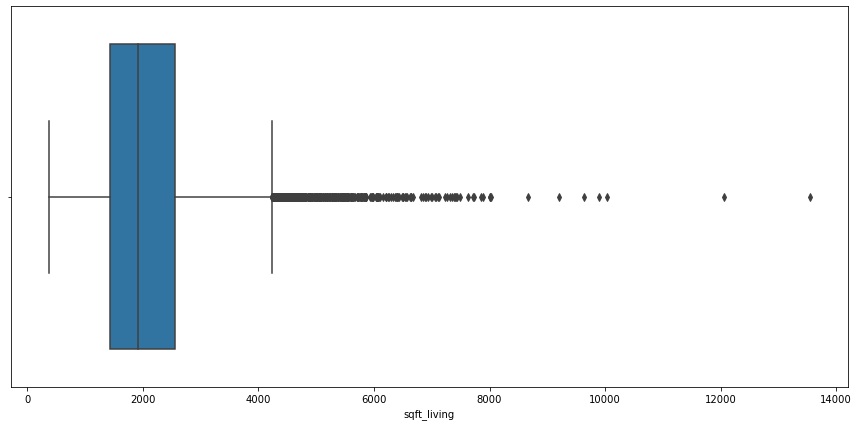

Column Name: sqft_lot


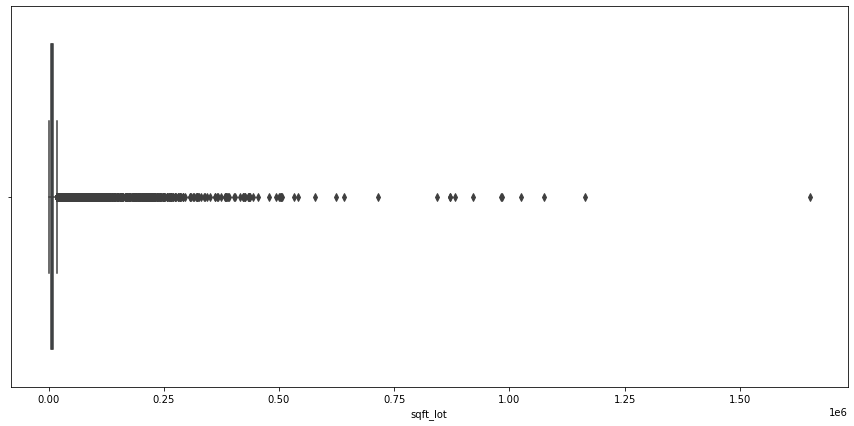

Column Name: waterfront


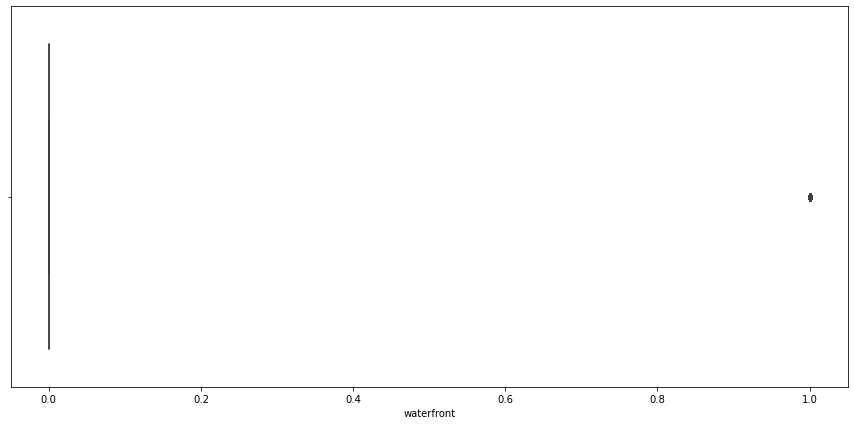

Column Name: sqft_above


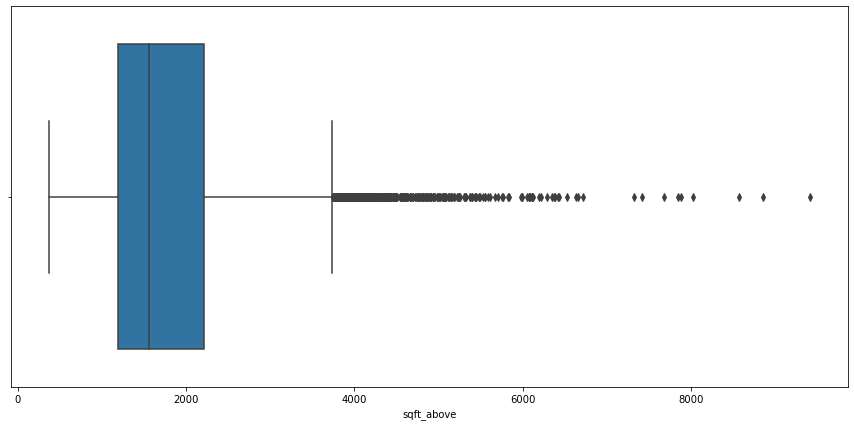

Column Name: sqft_basement


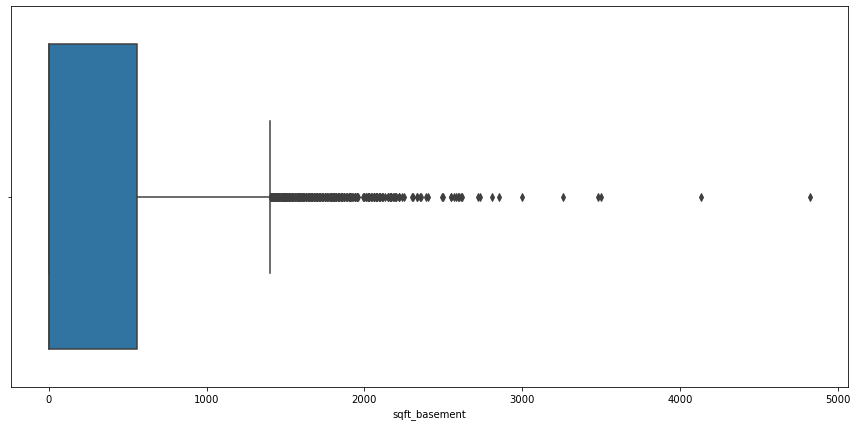

Column Name: yr_built


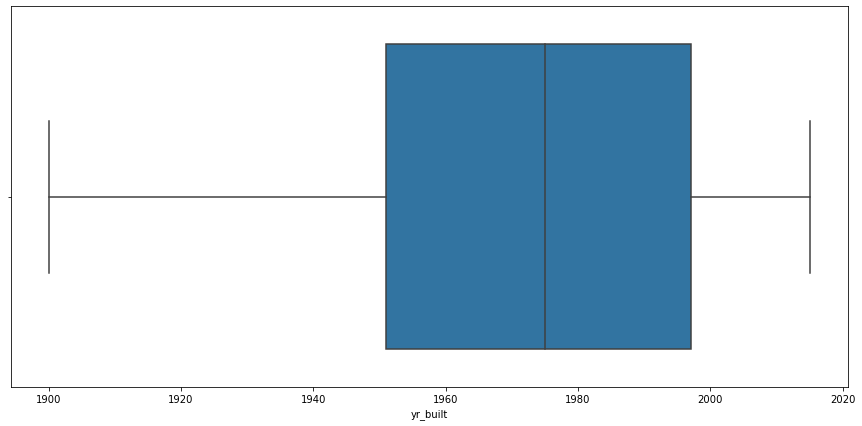

Column Name: yr_renovated


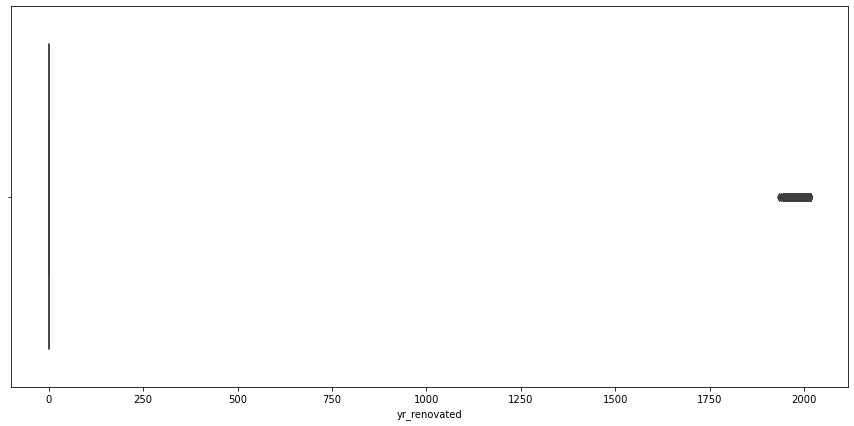

Column Name: zipcode


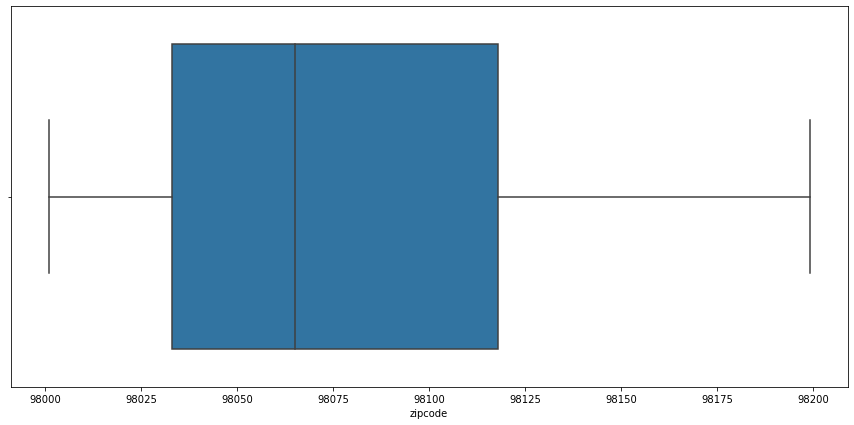

Column Name: lat


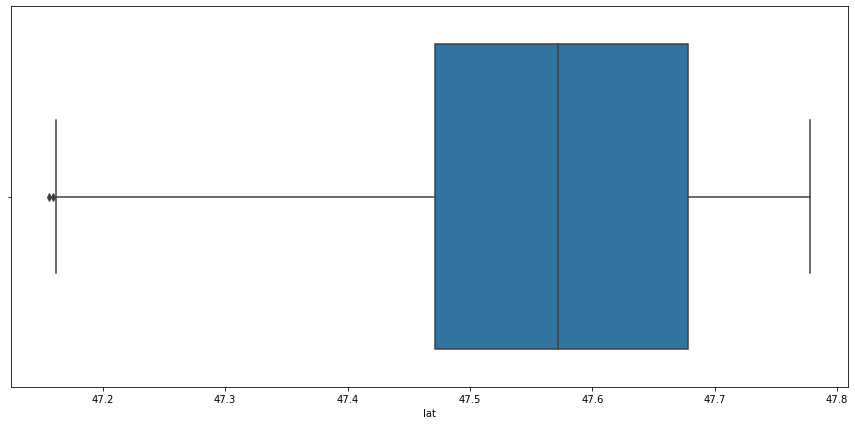

Column Name: long


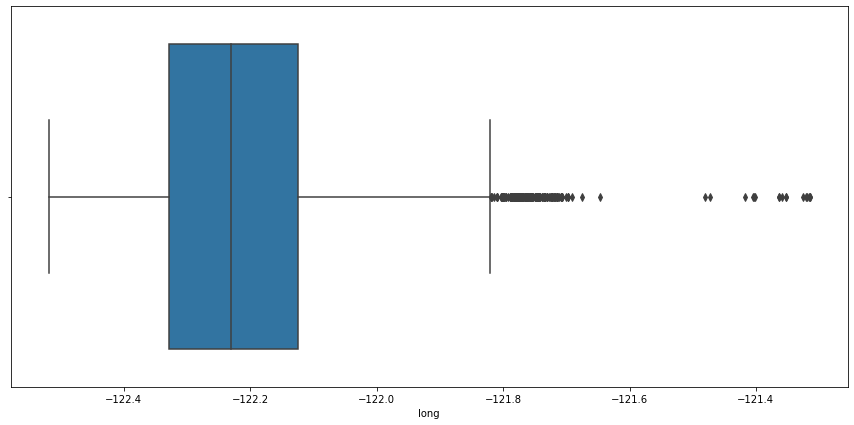

Column Name: sqft_living15


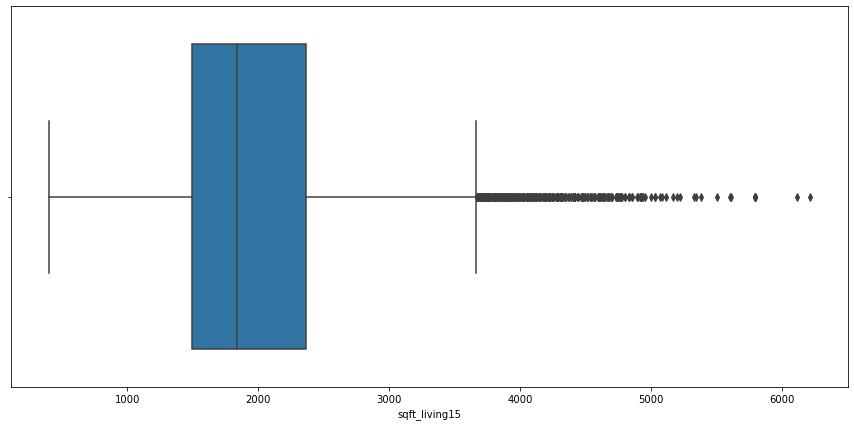

Column Name: sqft_lot15


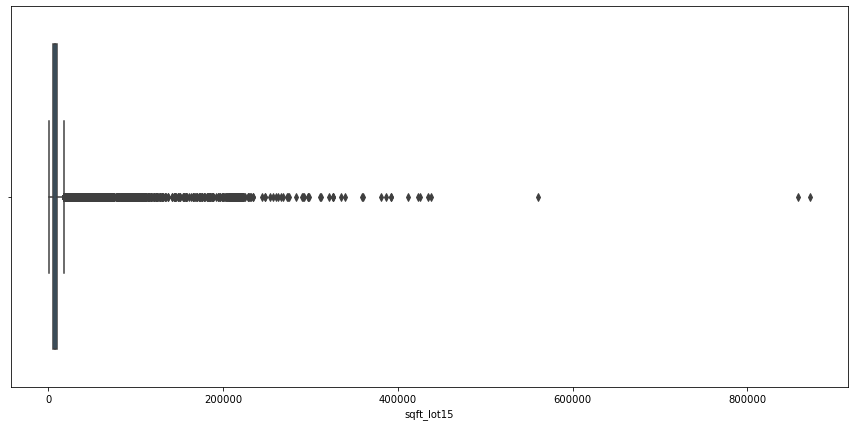

In [48]:

for i in continuous_columns:
    print("Column Name:", i)
    plt.figure(figsize=(15, 7))
    sns.boxplot(x=df[i])
    plt.show()

In [51]:
mod = []

def find_outlier(df_in, column_name):
    q1 = df_in[column_name].quantile(0.25)
    q3 = df_in[column_name].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5 * iqr
    df_high = df_in.loc[(df_in[column_name] > fence_high)]
    outlier_percentage = (df_high.shape[0] / len(df)) * 100
    outlier_percentage = round(outlier_percentage, 2)
    print(outlier_percentage)
    mod.append((column_name, outlier_percentage))

In [53]:
for i in continuous_columns:
    find_outlier(df, i)

length = len(continuous_columns)
result = []
names = []
for i in range(0, length - 1):
    result.append(mod[i][1])
    names.append(mod[i][0])

names

0.0
1.0
1.55
2.58
2.64
11.2
0.75
2.82
2.3
0.0
4.23
0.0
0.0
1.18
2.51
10.13


['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15']

In [54]:
pData = pd.DataFrame(result)
pData.rename(columns={0: "outlier_percentage"}, inplace=True)

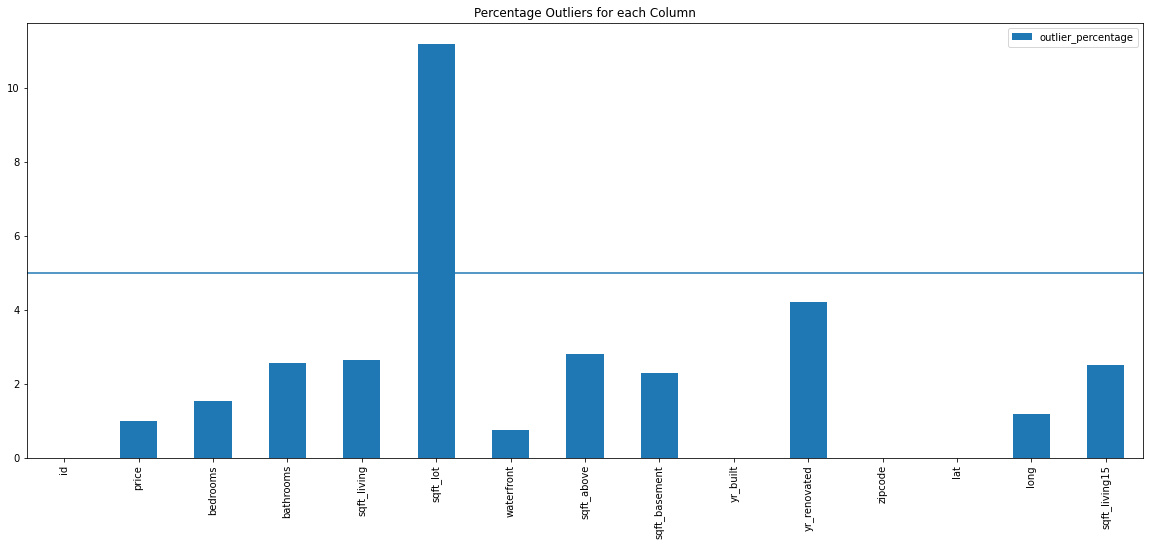

In [55]:
pData.plot.bar(figsize=(20, 8))
plt.xticks(np.arange(length - 1), names)
plt.title("Percentage Outliers for each Column")
plt.axhline(5)
plt.show()

In [18]:
df.drop(['date'], axis=1, inplace=True)
print(df.corr())
print(df.cov())

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.003751  0.001150   0.005162    -0.012241 -0.131911   
price         -0.003751  1.000000  0.343360   0.551249     0.695185  0.100025   
bedrooms       0.001150  0.343360  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.551249  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.695185  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.100025  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.310630  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.002727  0.174697 -0.006834   0.063744     0.103854  0.021632   
view           0.011536  0.346635  0.080008   0.188386     0.284709  0.074900   
condition     -0.023803  0.038918  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.703720  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.6

<AxesSubplot:>

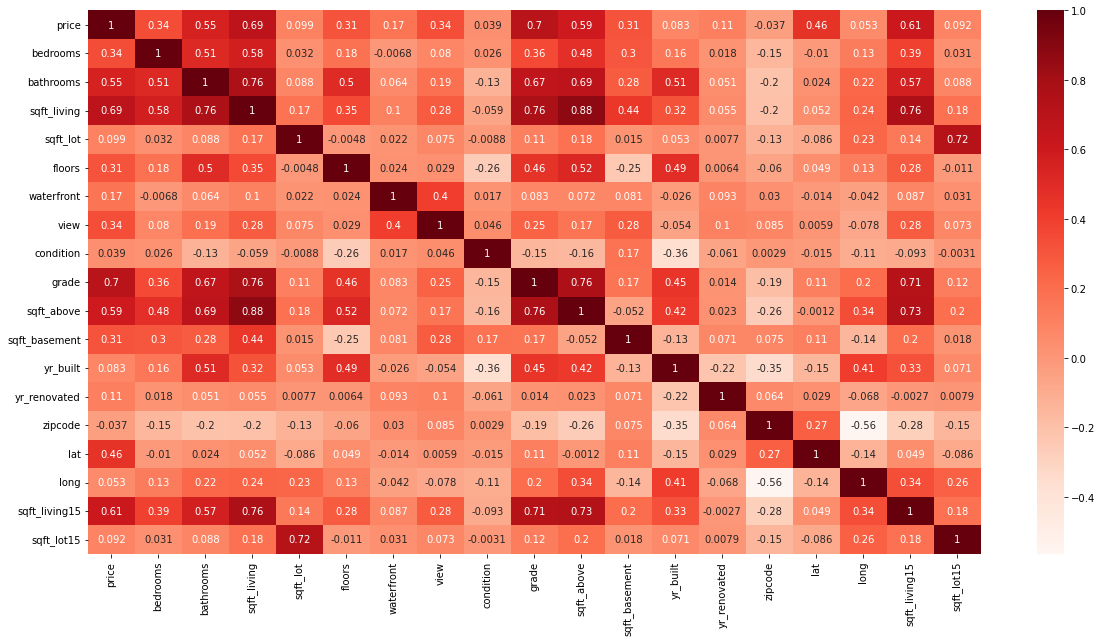

In [86]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.drop('id', axis=1).corr(), annot=True, cmap='Reds')

<img src="https://kingcounty.gov/about/region/~/media/about/maps/KC_simplemap_Oct2013.ashx" width="500" height="600">

<AxesSubplot:xlabel='long', ylabel='lat'>

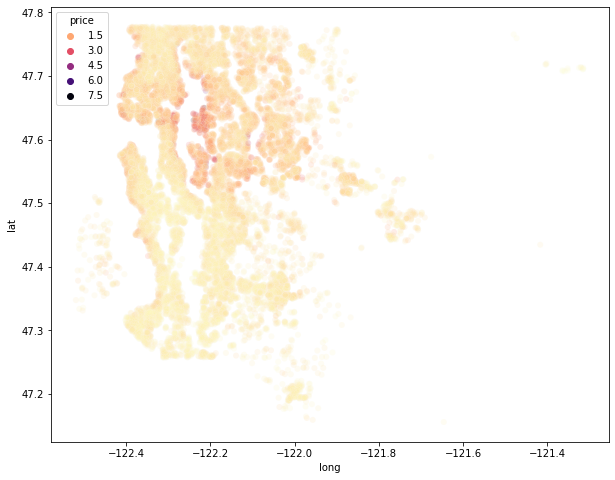

In [79]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=houses, hue='price', palette='magma_r', alpha=0.15)

In [61]:
y = df['price']
X = df.drop('price', axis=1)
xc = sm.add_constant(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(np.abs(round(stats.norm.isf(q=0.025), 2)))

1.96


In [63]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'\nR^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.7646492356239096

R^2 score for test: 0.7674548679326575


In [64]:
print(df.mean(), np.std(df, ddof=1))

id               4.580474e+09
price            2.567844e+00
bedrooms         3.373200e+00
bathrooms        2.115826e+00
sqft_living      2.080322e+03
sqft_lot         1.509941e+04
floors           1.494096e+00
waterfront       7.547345e-03
view             2.342918e-01
condition        3.409825e+00
grade            7.657915e+00
sqft_above       1.788597e+03
sqft_basement    2.917250e+02
yr_built         1.971000e+03
yr_renovated     8.446479e+01
zipcode          9.807795e+04
lat              4.756009e+01
long            -1.222140e+02
sqft_living15    1.986620e+03
sqft_lot15       1.275828e+04
dtype: float64 id               2.876736e+09
price            4.010116e-02
bedrooms         9.262989e-01
bathrooms        7.689843e-01
sqft_living      9.181061e+02
sqft_lot         4.141264e+04
floors           5.396828e-01
waterfront       8.654900e-02
view             7.663898e-01
condition        6.505456e-01
grade            1.173200e+00
sqft_above       8.277598e+02
sqft_basement    4.426678

In [65]:
Xc = sm.add_constant(X)
lin_reg = sm.OLS(y, Xc).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     3916.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        20:03:13   Log-Likelihood:                 54486.
No. Observations:               21597   AIC:                        -1.089e+05
Df Residuals:                   21578   BIC:                        -1.088e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0342      0.283      3.652

In [66]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [67]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'\nIntercept: {lin_reg.intercept_}')
print(f'\nR^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 7.88744312e-14 -7.26454005e-04  5.33126616e-03  6.95222231e-06
  3.72693422e-08  5.97292669e-03  2.63979025e-02  4.43082379e-03
  4.90706677e-03  1.21284580e-02  2.73712940e-06  4.21509290e-06
 -2.54091364e-04  2.80612822e-06 -4.78568042e-05  1.08748642e-01
 -1.13792416e-02  7.64646016e-06 -1.79444192e-08]

Intercept: 1.034244472441506

R^2 score: 0.7656230206423207


In [68]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
model_score = model.score(X_train, y_train)
print('R2 sq: ', model_score)
y_predicted = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))
print("RMSE:%.2f" % np.sqrt(mean_squared_error(y_test, y_predicted)))
print(f'R^2 score for train: {model.score(X_train, y_train)}')
print(f'\nR^2 score for test: {model.score(X_test, y_test)}')

R2 sq:  0.885968678645181
Mean squared error: 0.00
Test Variance score: 0.87
RMSE:0.01
R^2 score for train: 0.885968678645181

R^2 score for test: 0.8726998218632703


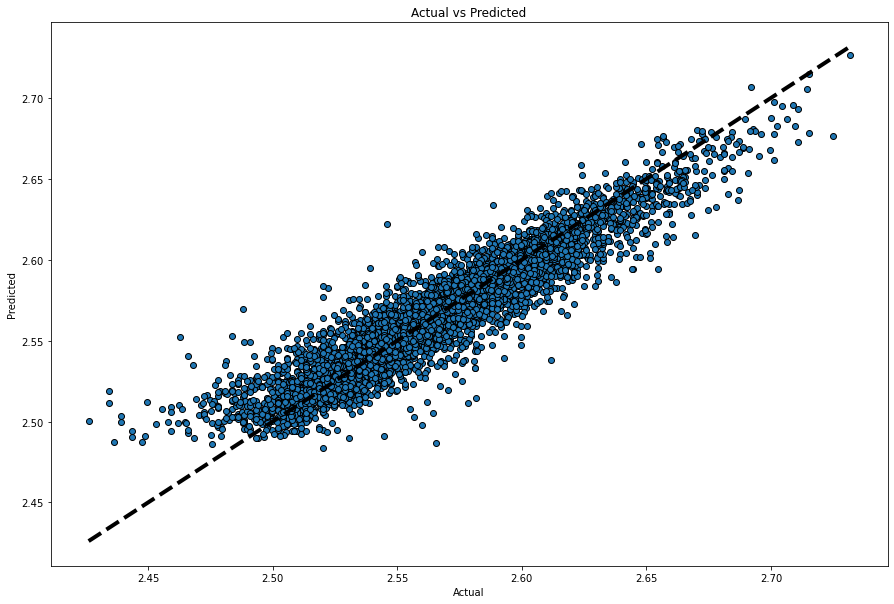

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()